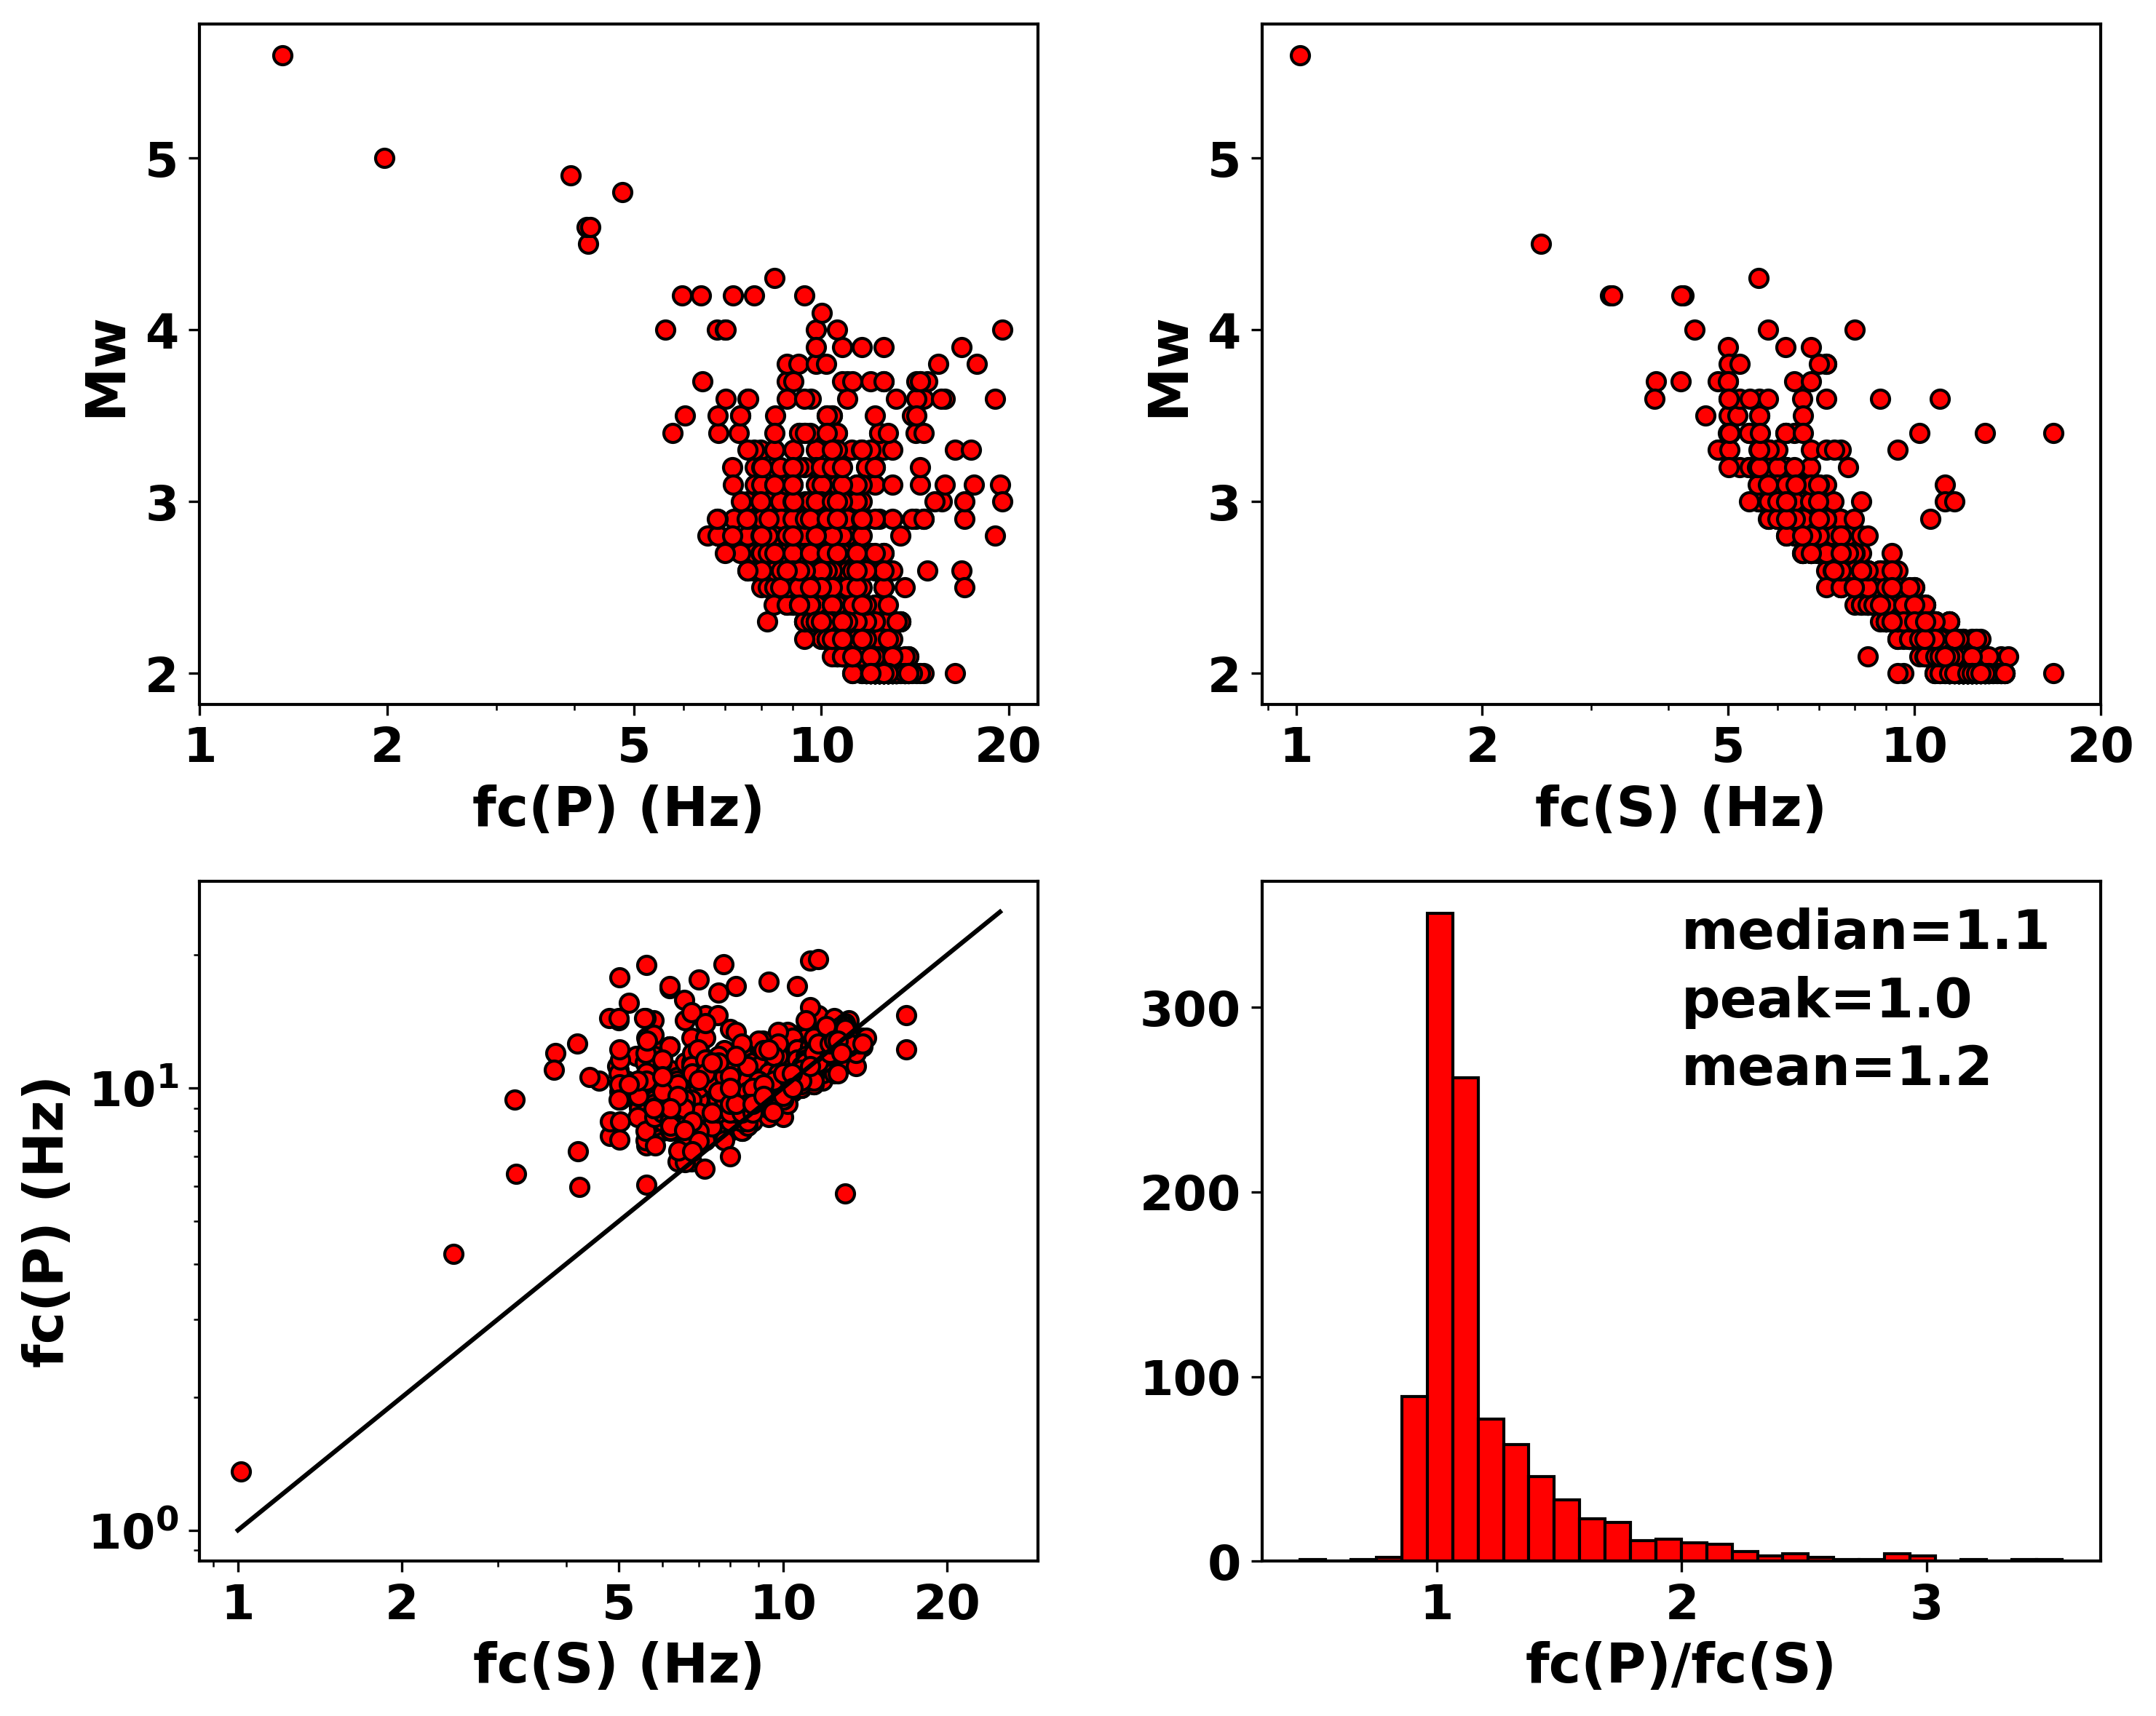

In [45]:
import os
import numpy as np
import matplotlib.ticker
import matplotlib.pyplot as plt
tstarOutP_path='../../TstarInv_TimWin1.28s_P/TstarOut/'
tstarOutS_path='../../TstarInv_TimWin1.28s_S/TstarOut/'
tstarPfile="./Output/P_tstar_selected.dat"
tstarSfile="./Output/S_tstar_selected.dat"
with open('./Input/EventCatlog','r') as f:
    temp=f.read().splitlines()
    MAG={}
    for line in temp:
        temp_mag=line.split()[5]
        id=line.split()[-2]
        MAG[id]=float(temp_mag)
        
def readEVID(tstarfile):
    with open(tstarfile,"r") as f:
        temp=f.read().splitlines()
        EVID=[]
        for line in temp:
            para=line.split()
            if para[0] =="#":
                evid=para[1]
                EVID.append(evid)
    return EVID

def readMagFc(EVID,MAG,TstarOutPath):
    magFcTstarInfo=[]
    for evid in EVID:
        filename=TstarOutPath+evid+'.mod'
#         print(filename)
        if os.path.exists(filename) and evid in MAG.keys() :
            with open(filename,'r') as f:
                line=f.read().splitlines()[0] 
                omega=float(line.split()[0])
                tstar=float(line.split()[1])
                fc=float(line.split()[2])
                qual=float(line.split()[3])
                fit=float(line.split()[4])
                magFcTstarInfo.append([MAG[evid],omega,tstar,fc,int(evid)])
    magFcTstarInfo=np.array(magFcTstarInfo)
    return magFcTstarInfo
 
EVID_P=readEVID(tstarPfile);  magFcTstarInfo_P=readMagFc(EVID_P,MAG,tstarOutP_path)
EVID_S=readEVID(tstarSfile);  magFcTstarInfo_S=readMagFc(EVID_S,MAG,tstarOutS_path)   


fig,ax=plt.subplots(2,2,figsize=(10,8))
mag=magFcTstarInfo_P[:,0];fcP=magFcTstarInfo_P[:,3]
ax[0,0].plot(fcP,mag,'or',markeredgecolor="black")
ax[0,0].set_xscale('log')
ax[0,0].set_xlabel('fc(P) (Hz)')
ax[0,0].set_ylabel('Mw')
ax[0,0].set_xticks([1,2,5,10,20])
ax[0,0].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
mag=magFcTstarInfo_S[:,0];fcS=magFcTstarInfo_S[:,3]
ax[0,1].plot(fcS,mag,'or',markeredgecolor="black")
ax[0,1].set_xscale('log')
ax[0,1].set_xlabel('fc(S) (Hz)')
ax[0,1].set_ylabel('Mw')
ax[0,1].set_xticks([1,2,5,10,20])
ax[0,1].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
common_evid=[]
for evid in EVID_P:
    if evid in EVID_S:
        common_evid.append(evid)
magFcTstarInfo_P_common=readMagFc(common_evid,MAG,tstarOutP_path)
magFcTstarInfo_S_common=readMagFc(common_evid,MAG,tstarOutS_path)  
mag_P=magFcTstarInfo_P_common[:,0];fcP=magFcTstarInfo_P_common[:,3]
mag_S=magFcTstarInfo_S_common[:,0];fcS=magFcTstarInfo_S_common[:,3]
# ax[2].scatter(fcP,fcS,s=mag_P*10,c="red",edgecolor='black')
ax[1,0].plot(fcS,fcP,'ro',markeredgecolor='black')
ax[1,0].set_xscale('log')
ax[1,0].set_yscale('log')
ax[1,0].set_ylabel('fc(P) (Hz)')
ax[1,0].set_xlabel('fc(S) (Hz)')
ax[1,0].set_xticks([1,2,5,10,20])
ax[1,0].plot([1,25],[1,25],'-k')
ax[1,0].set_xticks([1,2,5,10,20])
ax[1,0].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

ax[1,1].hist(fcP/fcS,bins=30,color='red',edgecolor="black")
ax[1,1].set_xlabel('fc(P)/fc(S)')
hist,edge=np.histogram(fcP/fcS,bins=30)
index=np.argmax(hist);peak_ratio=(edge[index+1]+edge[index])/2
ax[1,1].annotate("median={:.1f}".format(np.median(fcP/fcS)), xy=(0.5, 0.9), xycoords='axes fraction',fontsize=18)
ax[1,1].annotate("peak={:.1f}".format(peak_ratio), xy=(0.5, 0.8), xycoords='axes fraction',fontsize=18)
ax[1,1].annotate("mean={:.1f}".format(np.average(fcP/fcS)), xy=(0.5, 0.7), xycoords='axes fraction',fontsize=18)
plt.tight_layout(w_pad=3)
plt.savefig("./Figure/MwFcRatio.jpg")
plt.pause(0.2)

In [ ]:
#backup the cell above

import os
import numpy as np
import matplotlib.ticker
import matplotlib.pyplot as plt
tstarOutP_path='../../TstarInv_TimWin1.28s_P/TstarOut/'
tstarOutS_path='../../TstarInv_TimWin1.28s_S/TstarOut/'
tstarPfile="./Output/P_tstar_selected.dat"
tstarSfile="./Output/S_tstar_selected.dat"
with open('./Input/EventCatlog','r') as f:
    temp=f.read().splitlines()
    MAG={}
    for line in temp:
        temp_mag=line.split()[5]
        id=line.split()[-2]
        MAG[id]=float(temp_mag)
        
def readEVID(tstarfile):
    with open(tstarfile,"r") as f:
        temp=f.read().splitlines()
        EVID=[]
        for line in temp:
            para=line.split()
            if para[0] =="#":
                evid=para[1]
                EVID.append(evid)
    return EVID

def readMagFc(EVID,MAG,TstarOutPath):
    magFcTstarInfo=[]
    for evid in EVID:
        filename=TstarOutPath+evid+'.mod'
#         print(filename)
        if os.path.exists(filename) and evid in MAG.keys() :
            with open(filename,'r') as f:
                line=f.read().splitlines()[0] 
                omega=float(line.split()[0])
                tstar=float(line.split()[1])
                fc=float(line.split()[2])
                qual=float(line.split()[3])
                fit=float(line.split()[4])
                magFcTstarInfo.append([MAG[evid],omega,tstar,fc,int(evid)])
    magFcTstarInfo=np.array(magFcTstarInfo)
    return magFcTstarInfo
 
EVID_P=readEVID(tstarPfile);  magFcTstarInfo_P=readMagFc(EVID_P,MAG,tstarOutP_path)
EVID_S=readEVID(tstarSfile);  magFcTstarInfo_S=readMagFc(EVID_S,MAG,tstarOutS_path)   


fig,ax=plt.subplots(2,2,figsize=(10,8))
mag=magFcTstarInfo_P[:,0];fcP=magFcTstarInfo_P[:,3]
ax[0,0].plot(fcP,mag,'or',markeredgecolor="black")
ax[0,0].set_xscale('log')
ax[0,0].set_xlabel('fc(P) (Hz)')
ax[0,0].set_ylabel('Mw')
ax[0,0].set_xticks([1,2,5,10,20])
ax[0,0].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
mag=magFcTstarInfo_S[:,0];fcS=magFcTstarInfo_S[:,3]
ax[0,1].plot(fcS,mag,'or',markeredgecolor="black")
ax[0,1].set_xscale('log')
ax[0,1].set_xlabel('fc(S) (Hz)')
ax[0,1].set_ylabel('Mw')
ax[0,1].set_xticks([1,2,5,10,20])
ax[0,1].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
common_evid=[]
for evid in EVID_P:
    if evid in EVID_S:
        common_evid.append(evid)
magFcTstarInfo_P_common=readMagFc(common_evid,MAG,tstarOutP_path)
magFcTstarInfo_S_common=readMagFc(common_evid,MAG,tstarOutS_path)  
mag_P=magFcTstarInfo_P_common[:,0];fcP=magFcTstarInfo_P_common[:,3]
mag_S=magFcTstarInfo_S_common[:,0];fcS=magFcTstarInfo_S_common[:,3]
# ax[2].scatter(fcP,fcS,s=mag_P*10,c="red",edgecolor='black')
ax[1,0].plot(fcS,fcP,'ro',markeredgecolor='black')
ax[1,0].set_xscale('log')
ax[1,0].set_yscale('log')
ax[1,0].set_ylabel('fc(P) (Hz)')
ax[1,0].set_xlabel('fc(S) (Hz)')
ax[1,0].set_xticks([1,2,5,10,20])
ax[1,0].plot([1,25],[1,25],'-k')
ax[1,0].set_xticks([1,2,5,10,20])
ax[1,0].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

ax[1,1].hist(fcP/fcS,bins=30,color='red',edgecolor="black")
ax[1,1].set_xlabel('fc(P)/fc(S)')
hist,edge=np.histogram(fcP/fcS,bins=30)
index=np.argmax(hist);peak_ratio=(edge[index+1]+edge[index])/2
ax[1,1].annotate("median={:.1f}".format(np.median(fcP/fcS)), xy=(0.5, 0.9), xycoords='axes fraction',fontsize=18)
ax[1,1].annotate("peak={:.1f}".format(peak_ratio), xy=(0.5, 0.8), xycoords='axes fraction',fontsize=18)
ax[1,1].annotate("mean={:.1f}".format(np.average(fcP/fcS)), xy=(0.5, 0.7), xycoords='axes fraction',fontsize=18)
plt.tight_layout(w_pad=3)
plt.pause(0.2)